#### 참고 : tensorflow.keras 공식 문서 (Official API Docs) @ https://www.tensorflow.org/api_docs/python/tf/keras

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

<br> 

#### 1. Prepare train & test data (MNIST)

#### Train & Test split

In [2]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

#### Normalization

In [3]:
train_data = train_data.reshape(60000, 784) / 255.0
test_data = test_data.reshape(10000, 784) / 255.0

#### One-hot encoding

In [4]:
train_label = utils.to_categorical(train_label) # 0~9 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0~9 -> one-hot vector

<br> 

#### 2. Build the model & Set the criterion

In [5]:
model = models.Sequential() 
# model.add(layers.Flatten())

model.add(layers.Dense(input_dim=28*28, units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=10, activation='softmax')) # 0~9

In [6]:
# model.compile(optimizer=optimizers.Adam(0.01), 
#               loss=losses.categorical_crossentropy, 
#               metrics=[metrics.categorical_accuracy]) # Precision / Recall / F1-Score 적용하기 @ https://j.mp/3cf3lbi
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy]) # Precision / Recall / F1-Score 적용하기 @ https://j.mp/3cf3lbi

# metrics.top_k_categorical_accuracyp
# model.compile(optimizer='adam', 
#               loss=losses.categorical_crossentropy, 
#               metrics=['accuracy'])

<br> 

#### 3. Train the model

In [7]:
# Training 과정에서 epoch마다 활용할 validation set을 나눠줄 수 있습니다.
'''
train_data == 60000행
train == 0.8 == 48000행 / 100행 -> 480 batches
validation == 0.2 == 12000행
loss, - categorical_accuracy : train_data의 cross_entropy - train_data의 accuracy
val_loss, val_categorical_accuracy : validation_data의 cross_entropy - validation_data의 accuracy
'''

history = model.fit(train_data, train_label, batch_size=100, epochs=15, validation_split=0.2) 

Epoch 1/15
480/480 [==============================] - 2s 4ms/step - loss: 0.3024 - categorical_accuracy: 0.9084 - val_loss: 0.1204 - val_categorical_accuracy: 0.9633
Epoch 2/15
480/480 [==============================] - 2s 3ms/step - loss: 0.1414 - categorical_accuracy: 0.9566 - val_loss: 0.0944 - val_categorical_accuracy: 0.9725
Epoch 3/15
480/480 [==============================] - 2s 3ms/step - loss: 0.1041 - categorical_accuracy: 0.9675 - val_loss: 0.0878 - val_categorical_accuracy: 0.9732
Epoch 4/15
480/480 [==============================] - 2s 3ms/step - loss: 0.0837 - categorical_accuracy: 0.9734 - val_loss: 0.0878 - val_categorical_accuracy: 0.9743
Epoch 5/15
480/480 [==============================] - 1s 3ms/step - loss: 0.0711 - categorical_accuracy: 0.9766 - val_loss: 0.0749 - val_categorical_accuracy: 0.9783
Epoch 6/15
480/480 [==============================] - 2s 3ms/step - loss: 0.0609 - categorical_accuracy: 0.9800 - val_loss: 0.0799 - val_categorical_accuracy: 0.9766
Epoc

<br> 

#### 4. Test the model

In [8]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

In [9]:
history.history['loss']

[0.30235254764556885,
 0.14140117168426514,
 0.10414157807826996,
 0.08366416394710541,
 0.07111061364412308,
 0.060897547751665115,
 0.055240727961063385,
 0.04779842123389244,
 0.04404144734144211,
 0.03824794664978981,
 0.03458132967352867,
 0.0349837988615036,
 0.03124312311410904,
 0.031150413677096367,
 0.029249701648950577]

In [10]:
history.history['categorical_accuracy']

[0.9083541631698608,
 0.9566249847412109,
 0.9675416946411133,
 0.973395824432373,
 0.9766250252723694,
 0.9800416827201843,
 0.9821041822433472,
 0.98416668176651,
 0.9854791760444641,
 0.9871458411216736,
 0.9882916808128357,
 0.9886041879653931,
 0.9889583587646484,
 0.9893958568572998,
 0.9896875023841858]

In [11]:
result = model.evaluate(test_data, test_label, batch_size=100)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

100/100 [==============================] - 0s 1ms/step - loss: 0.0663 - categorical_accuracy: 0.9821
loss (cross-entropy) : 0.06634029000997543
test accuracy : 0.9821000099182129


<br> 

#### 5. Visualize the result

In [12]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

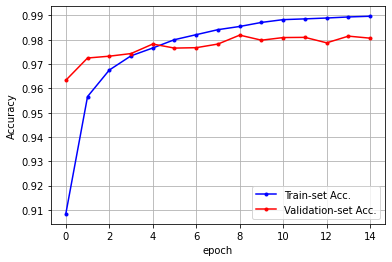

In [13]:
val_acc = history.history['val_categorical_accuracy']
acc = history.history['categorical_accuracy']

import numpy as np
import matplotlib.pyplot as plt

x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='lower right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()